In [2]:
import requests

from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Parameters
input_size = (224,224)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['kawung', 'Mega Mendung', 'Parang', 'Truntum']

def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= Image.NEAREST)
    img_arr = (np.array(nimg))/255  # Normalisasi ke [0, 1]
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0).astype(np.float32)

MODEL_PATH = f'./dense clean/keras aug/horizontal flip/flip_model1.keras'
model = load_model(MODEL_PATH,compile=False)
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Prediksi Probabilitas:
kawung: 0.02%
Mega Mendung: 99.85%
Parang: 0.10%
Truntum: 0.03%

Prediksi Akhir: Mega Mendung (99.85%)


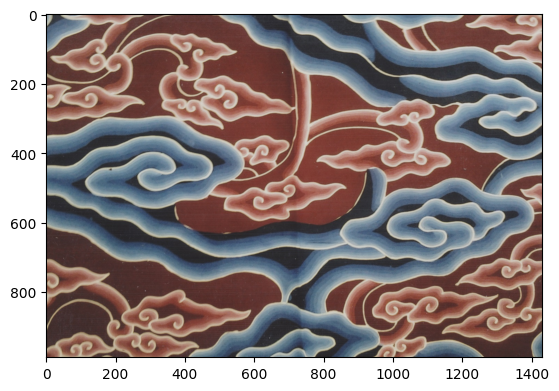

In [7]:
# read image
im = Image.open('../dataset/Isaac/test_files/mega_mendung-01.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

# Menampilkan hasil prediksi dengan persentase
print("Prediksi Probabilitas:")
for i, label in enumerate(labels):
    print(f"{label}: {y[0][i] * 100:.2f}%")

# Menampilkan kelas dengan probabilitas tertinggi
plt.imshow(im)
predicted_class = np.argmax(y)
predicted_label = labels[predicted_class]
predicted_confidence = np.max(y) * 100

print(f"\nPrediksi Akhir: {predicted_label} ({predicted_confidence:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


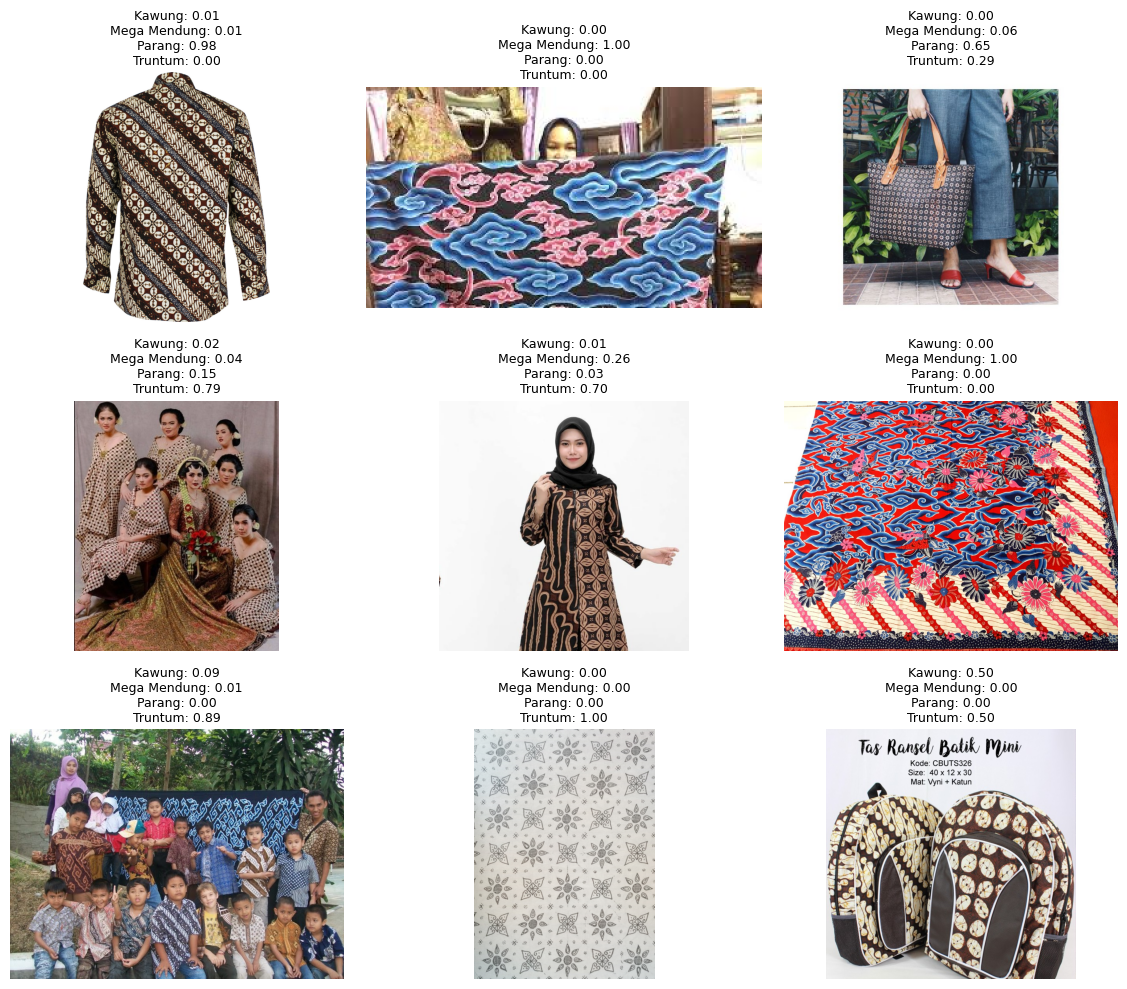

In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img

# --- Load Model ---
# model = tf.keras.models.load_model('./dense clean/keras aug/zoom in/A2/zoom_model_5.keras')
# model = tf.keras.models.load_model("./dense clean/keras aug/rotate/rotate_model_2.keras")
model = tf.keras.models.load_model("./dense clean/keras aug/elastic/elastic_model_1.keras")
# model = tf.keras.models.load_model("./dense clean/keras aug/zoom+rotate/gabungan_model_3.keras") # 4 semua bisa
# model = tf.keras.models.load_model("./dense clean/keras aug/zoom+elastic/gabungan_model_1.keras") # 4 bisa semua
# model = tf.keras.models.load_model("./dense clean/keras aug/zoom+elastic+rotate/gabungan_model_1.keras")

# --- Label Kelas ---
labels = ['Kawung', 'Mega Mendung', 'Parang', 'Truntum']

# --- Path Gambar ---
base_path = 'C:/Users/ASUS/Downloads/testing batik/cek skripsi'
image_paths = [
    os.path.join(base_path, 'kawung-parang-lereng.jpg'),
    os.path.join(base_path, 'images.jpg'),
    os.path.join(base_path, 'truntum-pakaian-tas-truntum.jpg'),
    os.path.join(base_path, 'kawung-pakaian-ramai-kawung.jpg'),
    os.path.join(base_path, 'parang-kawung.jpg'),
    os.path.join(base_path, 'mega_mendung-parang.jpeg'),
    os.path.join(base_path, 'pakaian-ramai-campur.jpg'),
    os.path.join(base_path, 'truntum-kembang-pala.jpg'),
    os.path.join(base_path, 'parang-kawung-ransel.jpg')
]

# Fungsi preprocessing gambar
def preprocess_image(image):
    """Mengubah gambar menjadi array yang sesuai dengan input model."""
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (224, 224)) 
    image = image / 255.0 
    image = np.expand_dims(image, axis=0)
    return image

# Plot hasil
plt.figure(figsize=(12, 10))

for i, path in enumerate(image_paths):
    # Load gambar sebagai PIL
    pil_img = load_img(path)
    
    # Preprocess dengan fungsi yang diberikan
    processed_img = preprocess_image(pil_img)
    
    # Prediksi
    prediction = model.predict(processed_img)[0]

    # Visualisasi
    plt.subplot(3, 3, i + 1)
    plt.imshow(pil_img)
    plt.axis('off')
    
    # Tampilkan hasil prediksi label dan skor
    result_text = '\n'.join([f'{label}: {prediction[j]:.2f}' for j, label in enumerate(labels)])
    plt.title(result_text, fontsize=9)

plt.tight_layout()
plt.show()